In [81]:
import sklearn
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Churn.csv') 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- No null values in our dataset

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- TotalCharges should be numerical data type but it object in our dataset, Convert it into float or numerical.

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

- Separating categorical and numerical columns

# EDA

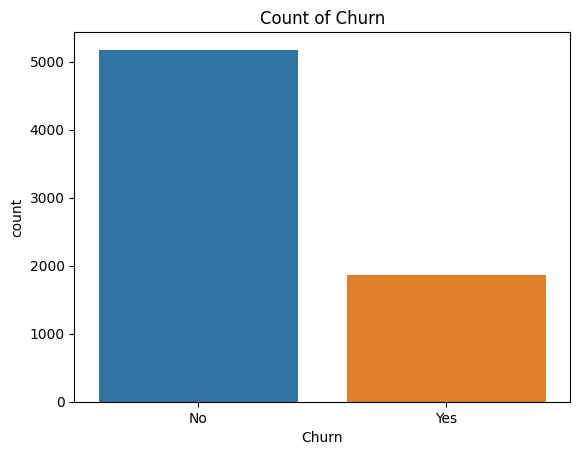

In [9]:
sns.countplot(data=df, x='Churn', hue='Churn')
plt.title('Count of Churn')
plt.show()

# Checking for imbalance dataset

In [10]:
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

- as we can see that this is an imblanced dataset 

In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df.TotalCharges = df.TotalCharges.fillna(df.TotalCharges.median())

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- dropping irrelavant columns

In [14]:
df = df.drop('customerID', axis=1)

- converting each column name to lower case for convienence 

In [15]:
df.columns = df.columns.str.lower()

In [16]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Analysing Numerical Columns 

In [17]:
numerical_features = {feature for feature in df.columns if df[feature].dtypes != 'O'}
print(numerical_features)

{'totalcharges', 'tenure', 'seniorcitizen', 'monthlycharges'}


In [18]:
numerical_features

{'monthlycharges', 'seniorcitizen', 'tenure', 'totalcharges'}

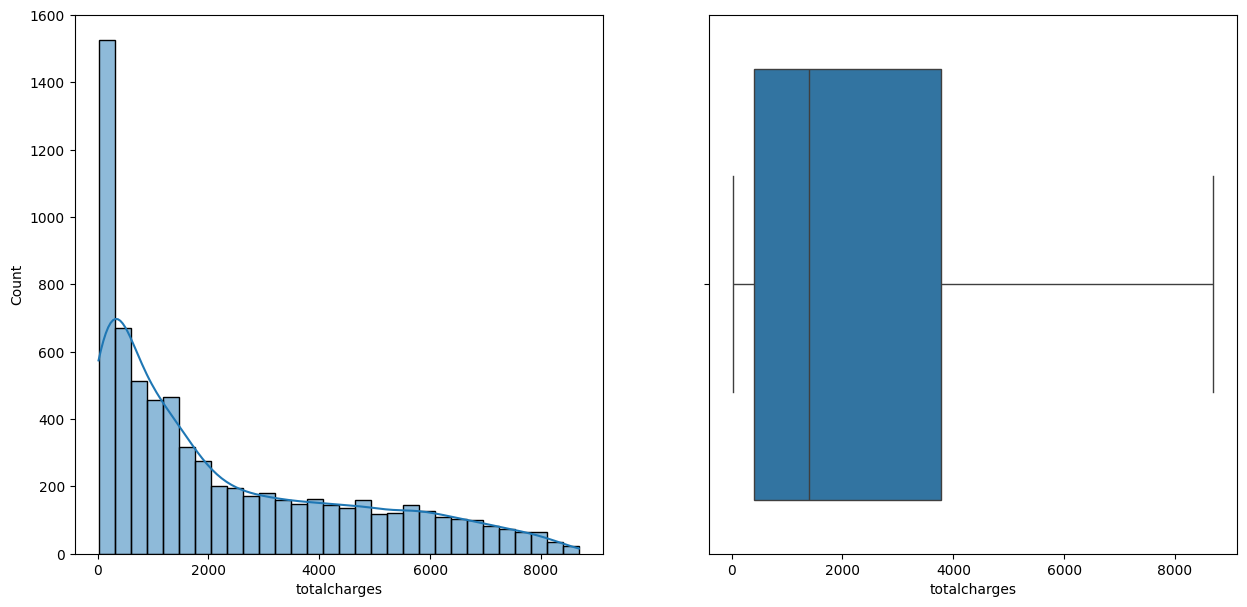

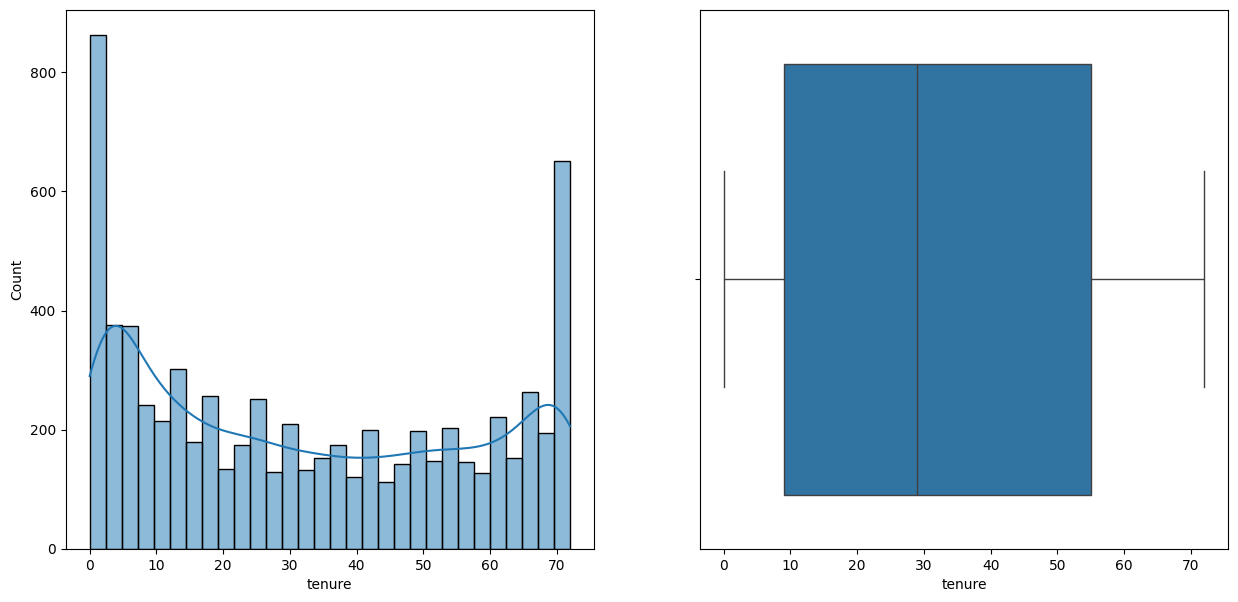

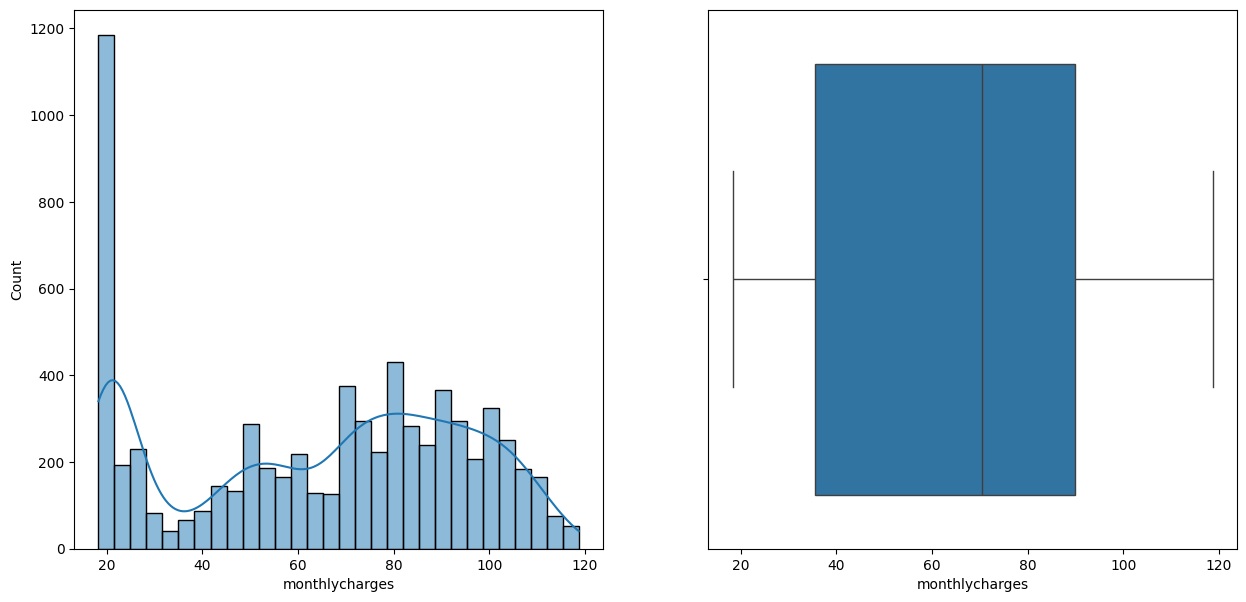

In [19]:
for feature in numerical_features:
    if feature != 'seniorcitizen':
        plt.figure(figsize=(15,7))
        plt.subplot(1,2,1)
        sns.histplot(data=df, x=feature, kde=True, bins=30)

        plt.subplot(1,2,2)
        sns.boxplot(x=df[feature])

- as we can see that there are no outliers present in the numerical features 

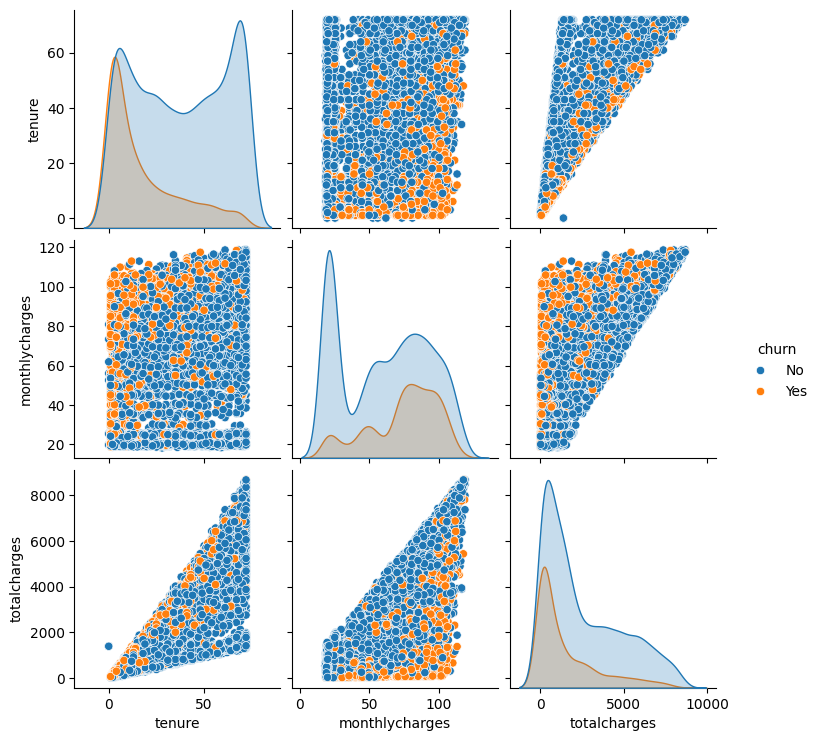

In [20]:
sns.pairplot(df.drop('seniorcitizen', axis=1), hue='churn', kind='scatter')

- from above plot we can deduce some paramters
1. **Tenure below 15 is where most churn occurs**
2. **Higher monthly charges above 80$ result in more churn**

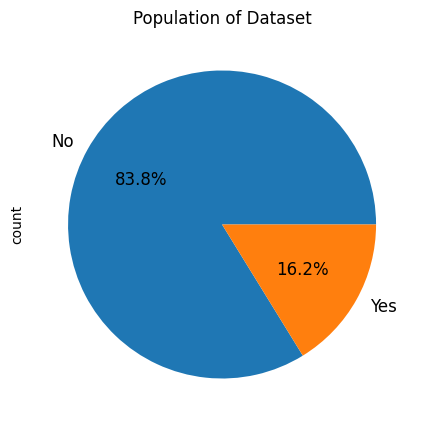

In [21]:
df.seniorcitizen.value_counts().plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
plt.title('Population of Dataset')
plt.show()

# Bivariate Analysis

In [22]:
categorical_features = {feature for feature in df.columns if df[feature].dtypes == 'O'}
categorical_features

{'churn',
 'contract',
 'dependents',
 'deviceprotection',
 'gender',
 'internetservice',
 'multiplelines',
 'onlinebackup',
 'onlinesecurity',
 'paperlessbilling',
 'partner',
 'paymentmethod',
 'phoneservice',
 'streamingmovies',
 'streamingtv',
 'techsupport'}

<Figure size 640x480 with 0 Axes>

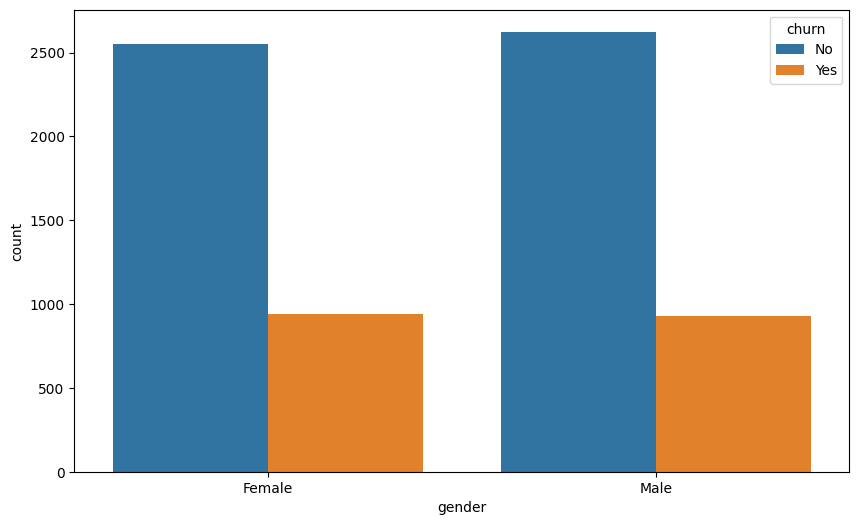

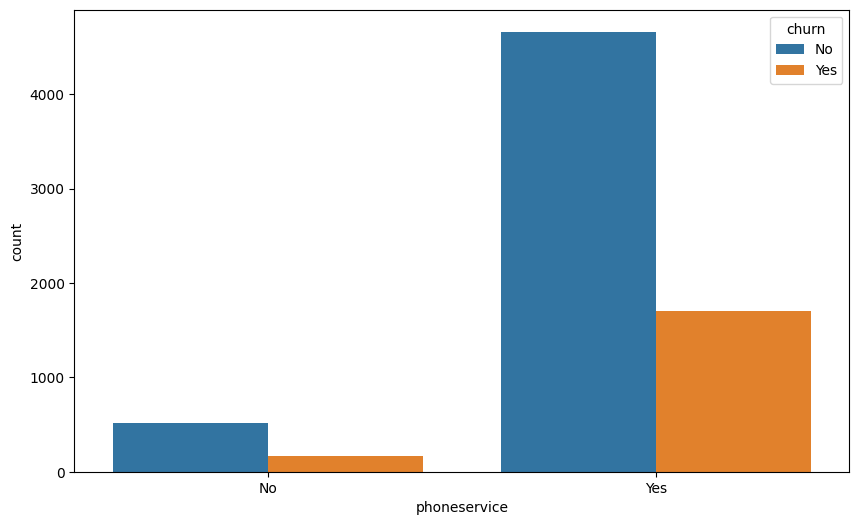

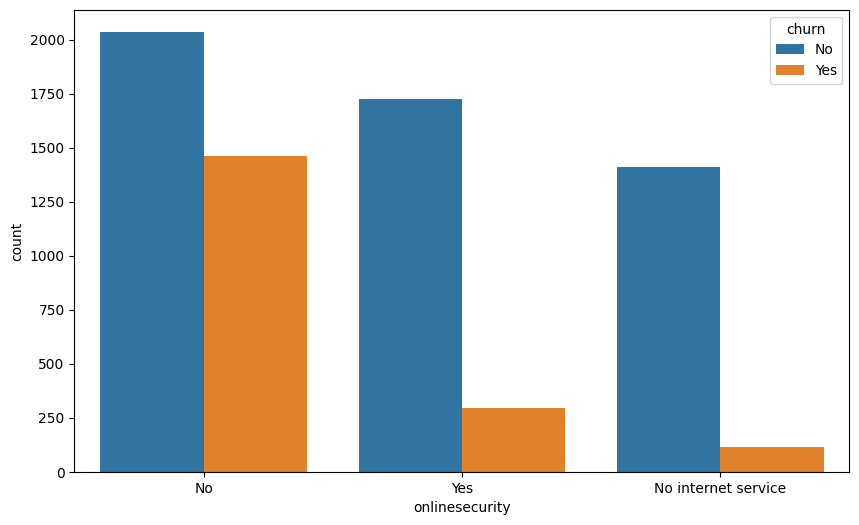

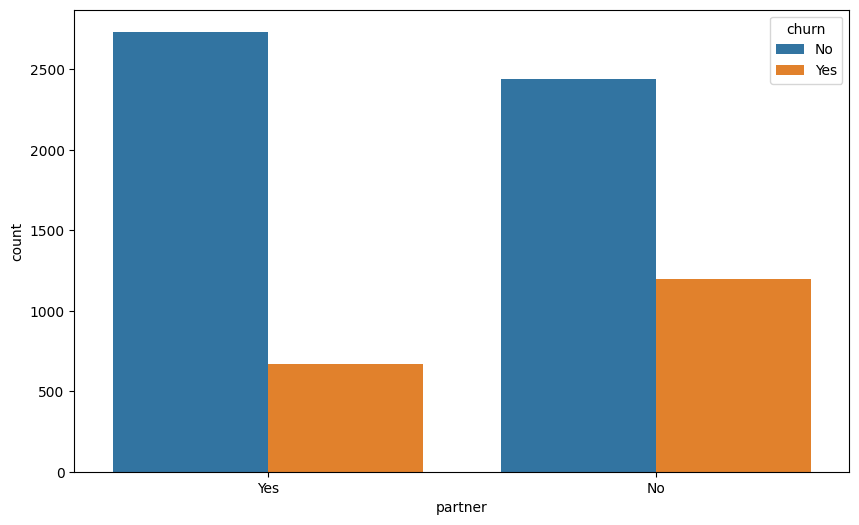

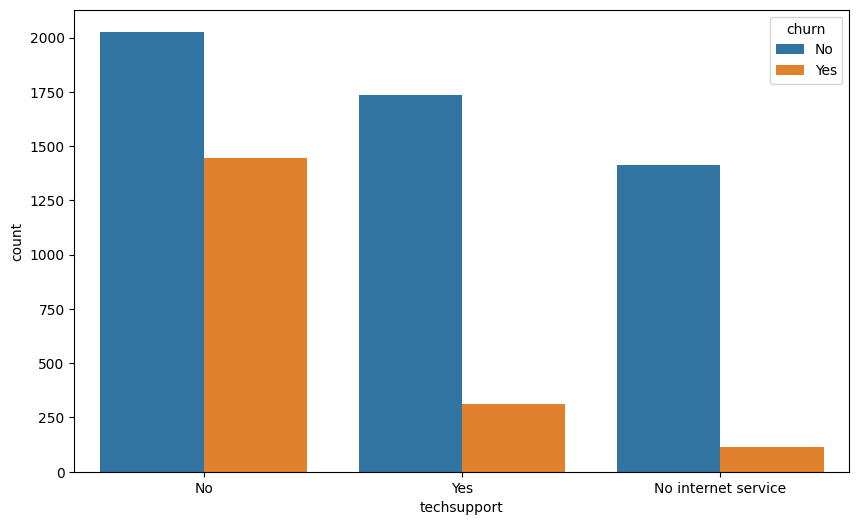

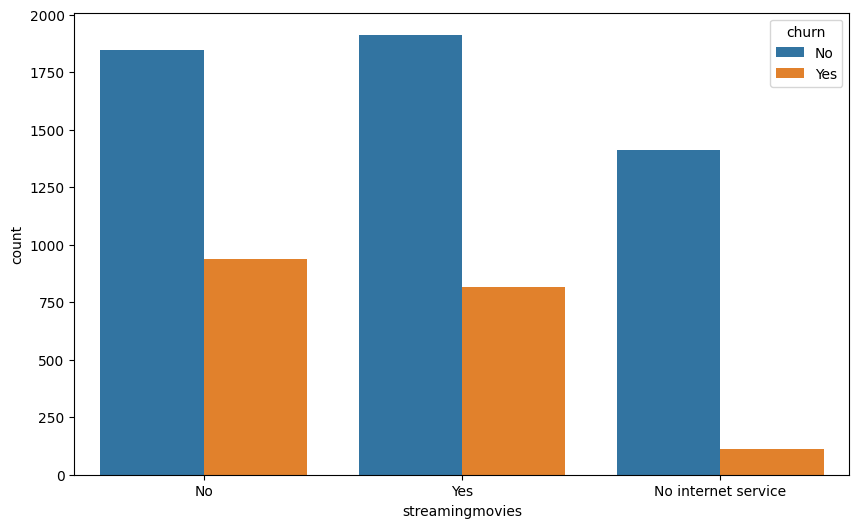

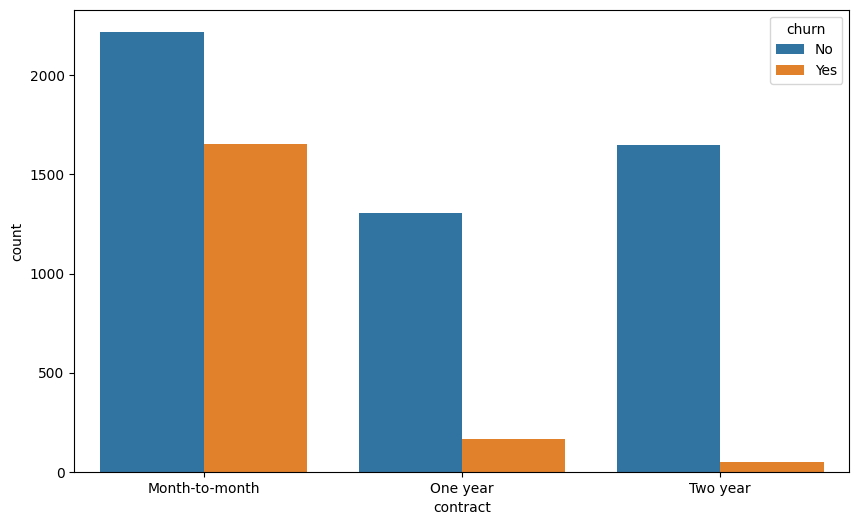

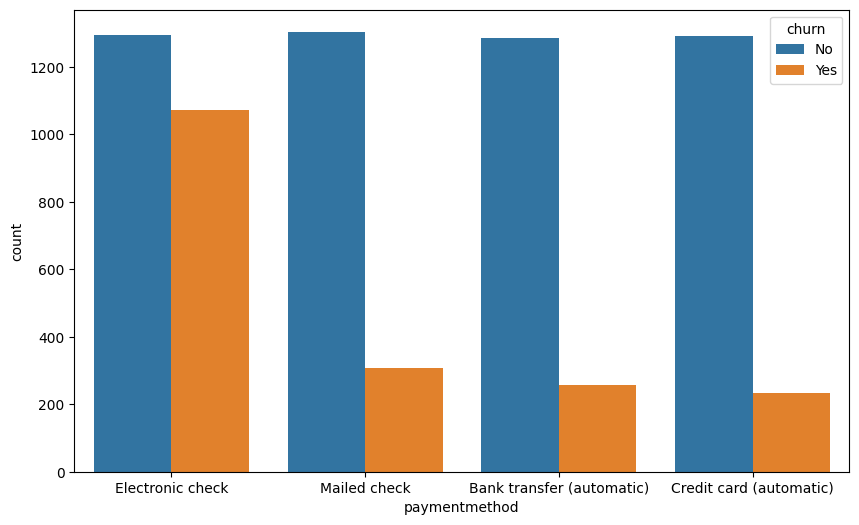

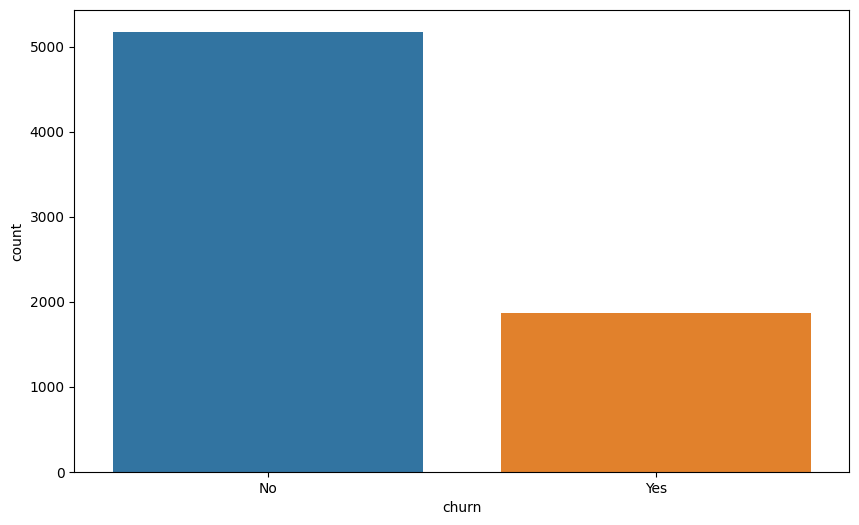

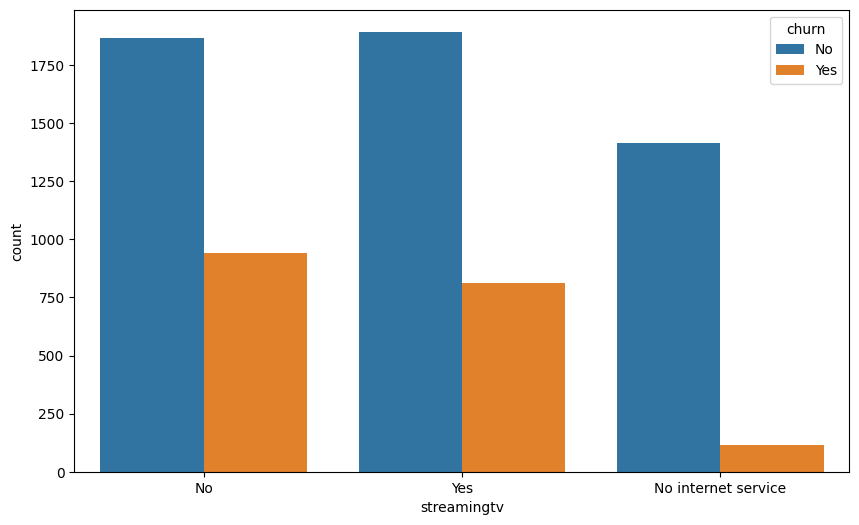

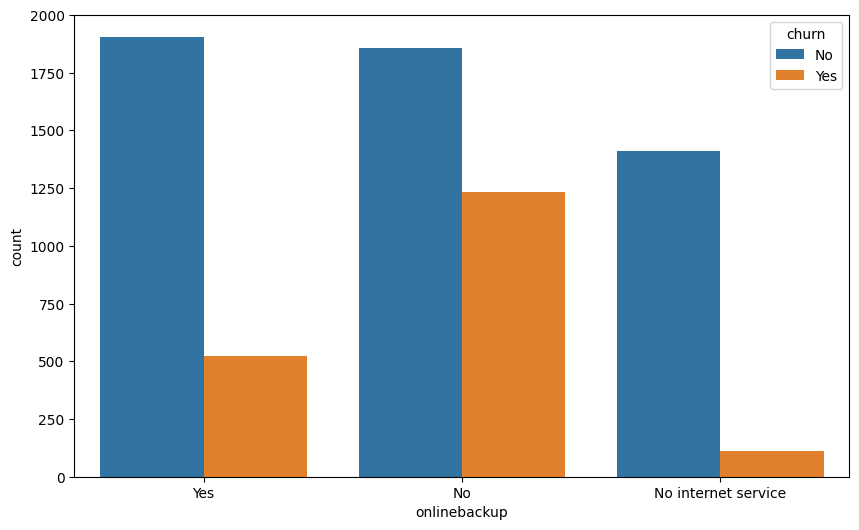

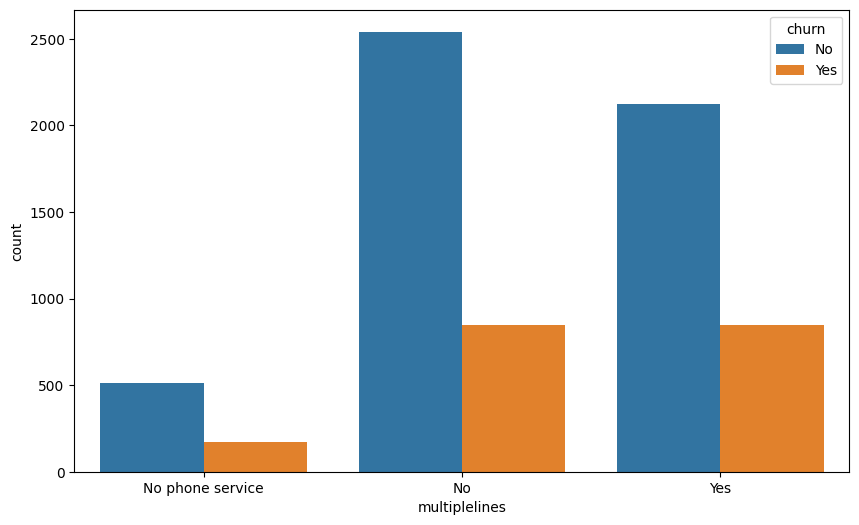

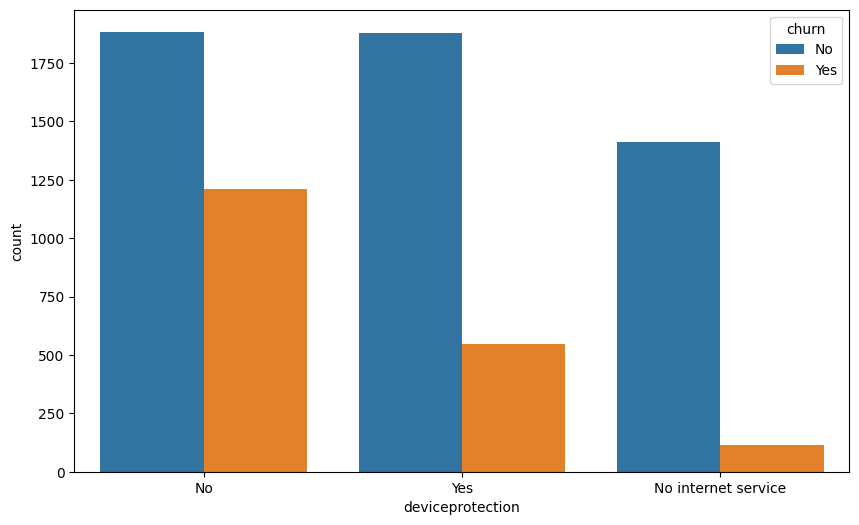

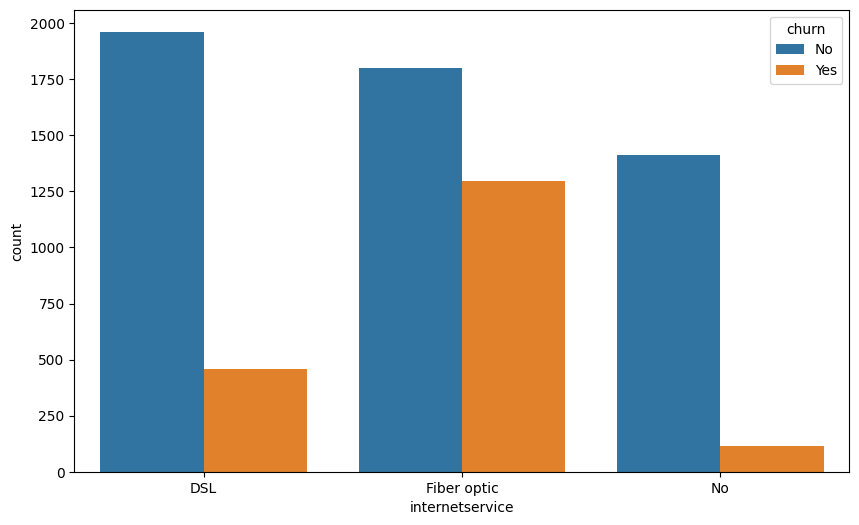

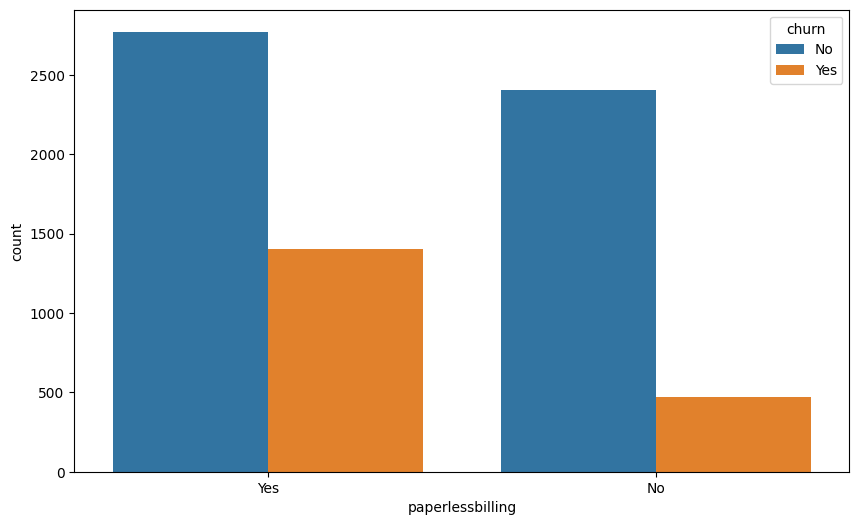

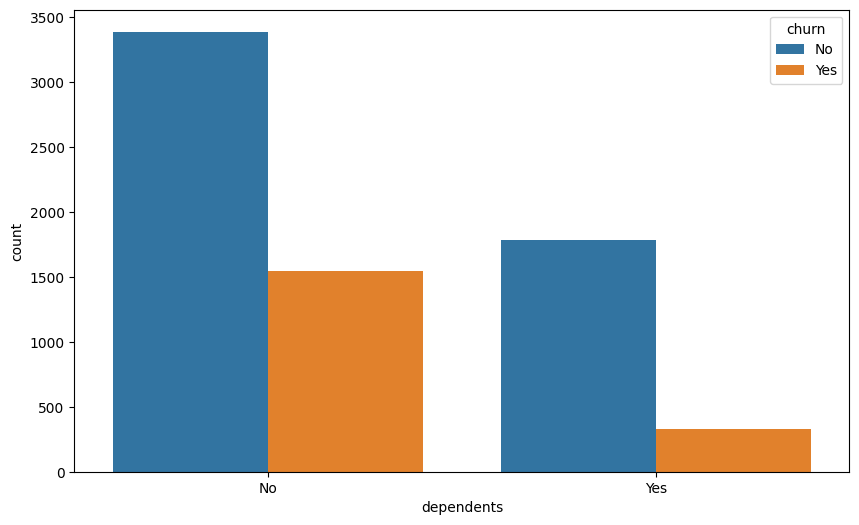

In [23]:
for i, feature in enumerate(categorical_features):
    plt.figure(i)
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=feature, hue='churn')
plt.show()

- Since there are no NaN values and no outlier treatment to be done only thing left is to balance the dataset and perform label encoding

# Label Encoding 

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [25]:
for feature in categorical_features:
    df[feature] = encoder.fit_transform(df[feature])

In [26]:
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


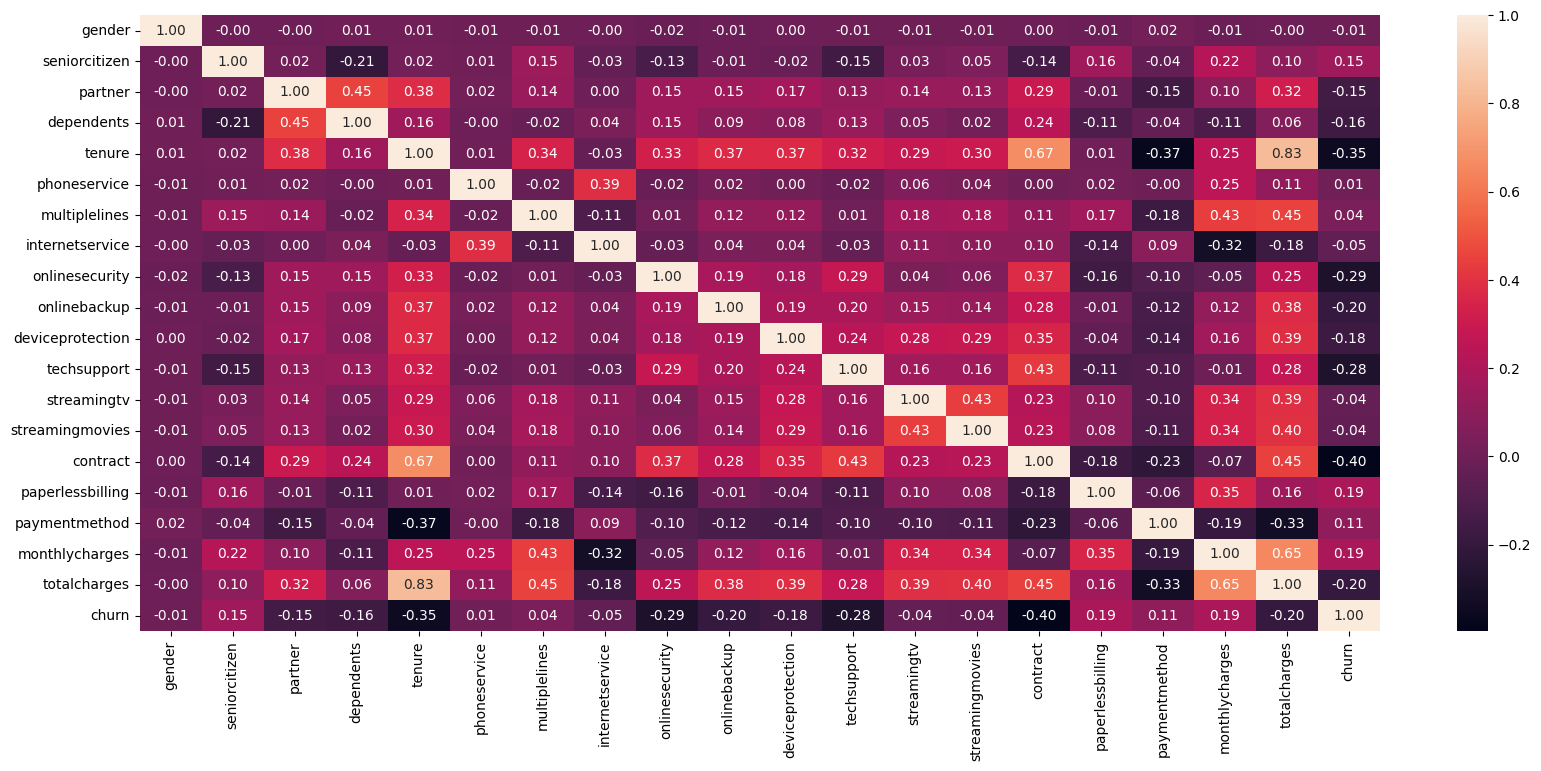

In [27]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

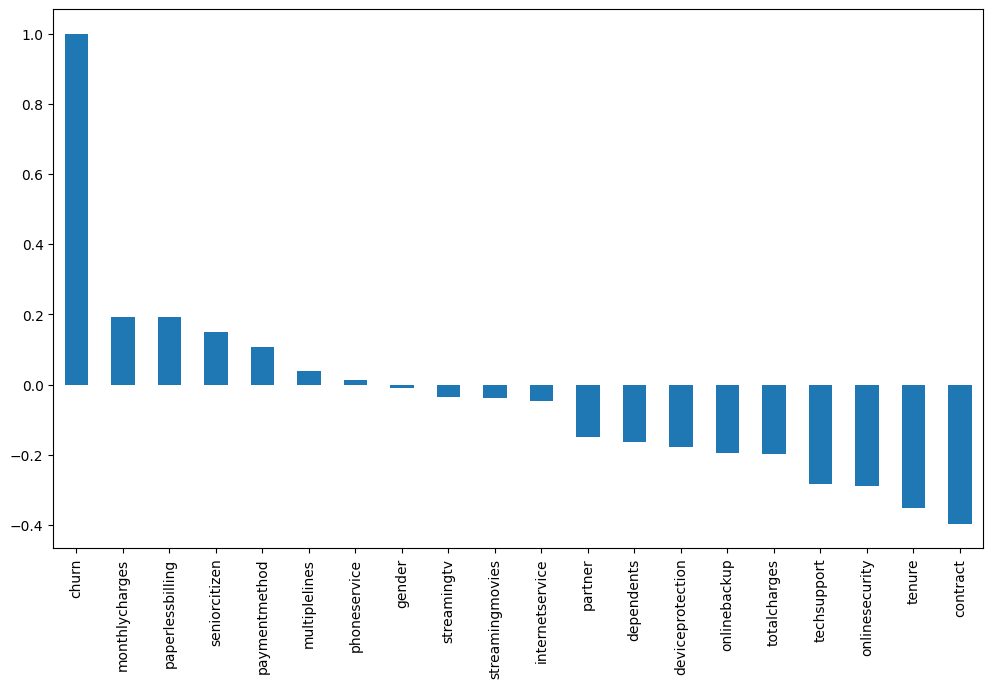

In [28]:
plt.figure(figsize=(12,7))
df.corr()['churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

# Feature Selection 

In [29]:
from sklearn.feature_selection import SelectKBest

selection = SelectKBest()

In [30]:
X = df.drop('churn', axis=1)
Y = df.churn

In [31]:
X = selection.fit_transform(X, Y)

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(5634, 10)

In [34]:
X_test.shape

(1409, 10)

# Using Resampling 

In [35]:
from imblearn.combine import SMOTEENN

st = SMOTEENN()

In [36]:
X_train_st, y_train_st = st.fit_resample(X_train, y_train)
print('No. of classes before resample {}'.format(Counter(y_train)))
print('No. of classes after resample {}'.format(Counter(y_train_st)))

No. of classes before resample Counter({0: 4138, 1: 1496})
No. of classes after resample Counter({1: 2412, 0: 2079})


- **Make sure to use the resampling technique only on the training dataset to avoid information leakage**

In [37]:
X_train_samp, X_test_samp, y_train_samp, y_test_samp = train_test_split(X_train_st, y_train_st, test_size=0.2)

In [38]:
X_train_samp.shape

(3592, 10)

In [39]:
X_test_samp.shape

(899, 10)

In [40]:
y_train_samp.shape

(3592,)

# Building Machine Learning model

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dtc = DecisionTreeClassifier()
gtc = GradientBoostingClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()

In [42]:
dtc.fit(X_train_samp, y_train_samp)

DecisionTreeClassifier()

In [43]:
dtc_pred = dtc.predict(X_test_samp)

In [44]:
print('Decision Tree metrics without Hyperparameter Tuning:')
print('accruracy:', accuracy_score(y_test_samp, dtc_pred))
print('confusion matrix:\n', confusion_matrix(y_test_samp, dtc_pred))
print(classification_report(y_test_samp, dtc_pred))

Decision Tree metrics without Hyperparameter Tuning:
accruracy: 0.9488320355951056
confusion matrix:
 [[388  23]
 [ 23 465]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       411
           1       0.95      0.95      0.95       488

    accuracy                           0.95       899
   macro avg       0.95      0.95      0.95       899
weighted avg       0.95      0.95      0.95       899



In [45]:
gtc.fit(X_train_samp, y_train_samp)

GradientBoostingClassifier()

In [46]:
gtc_pred = gtc.predict(X_test_samp)

In [47]:
print('GradientBoost metrics without Hyperparameter Tuning:')
print('accruracy:', accuracy_score(y_test_samp, gtc_pred))
print('confusion matrix:\n', confusion_matrix(y_test_samp, gtc_pred))
print(classification_report(y_test_samp, gtc_pred))

GradientBoost metrics without Hyperparameter Tuning:
accruracy: 0.9655172413793104
confusion matrix:
 [[395  16]
 [ 15 473]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       411
           1       0.97      0.97      0.97       488

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [48]:
knn.fit(X_train_samp, y_train_samp)

KNeighborsClassifier()

In [49]:
knn_pred = gtc.predict(X_test_samp)

In [50]:
print('KNN metrics without Hyperparameter Tuning:')
print('accruracy:', accuracy_score(y_test_samp, knn_pred))
print('confusion matrix:\n', confusion_matrix(y_test_samp, knn_pred))
print(classification_report(y_test_samp, knn_pred))

KNN metrics without Hyperparameter Tuning:
accruracy: 0.9655172413793104
confusion matrix:
 [[395  16]
 [ 15 473]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       411
           1       0.97      0.97      0.97       488

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



- since knn and Gradient boosting classifier is giving us the best results we will move on with using any of these two for our generalized model.
- I will use Gradient Boosting for this particular use case. 

# HYPERPARAMETER TUNING 

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

model = GridSearchCV(gtc, param_grid, cv=5, scoring='accuracy')
model.fit(X_train_samp, y_train_samp)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [56]:
y_preds = model.predict(X_test_samp)

In [58]:
accuracy = accuracy_score(y_test_samp, y_preds)
summary = classification_report(y_test_samp, y_preds)
print('accuracy after hyperparameter tuning: ',round(accuracy*100, 2))
print(' summary : \n',summary)

accuracy after hyperparameter tuning:  97.44
 summary : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       411
           1       0.98      0.98      0.98       488

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899



In [60]:
model.best_params_

{'learning_rate': 0.2,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 150,
 'subsample': 1.0}

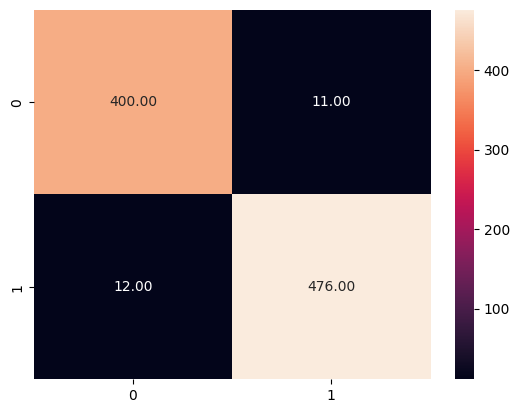

In [59]:
sns.heatmap(confusion_matrix(y_test_samp, y_preds), annot=True, fmt='.2f')
plt.show()

# Saving the model

In [102]:
import pickle

filename = 'Model.sav'
pickle.dump(model, open(filename, 'wb'))

In [103]:
load_model = pickle.load(open(filename, 'rb'))

In [104]:
load_model.score(X_test_samp, y_test_samp)

0.9744160177975528

In [105]:
Dependents = 'No'
tenure = 34
OnlineSecurity = 'Yes'
OnlineBackup = 'Yes'
DeviceProtection = 'No'
TechSupport = 'No'
Contract = 'One year'
PaperlessBilling = 'No'
MonthlyCharges = 56.95
TotalCharges = 1889.5

In [106]:
data = [[Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,
         MonthlyCharges,TotalCharges]]

In [107]:
df = pd.DataFrame(data=data, columns=['Dependents','tenure','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling',
        'MonthlyCharges','TotalCharges'])
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,No,34,Yes,Yes,No,No,One year,No,56.95,1889.5


In [108]:
print(df.dtypes)

Dependents           object
tenure                int64
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


In [109]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        categorical_feature = feature
        print(categorical_feature)

Dependents
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
Contract
PaperlessBilling


In [110]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        df[feature] = encoder.fit_transform(df[feature])

In [111]:
df.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,34,0,0,0,0,0,0,56.95,1889.5


In [112]:
load_model.predict(df)

array([0])

In [113]:
load_model.predict_proba(df)[:,1]

array([0.02389951])

In [114]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)